In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [24]:
data = pd.read_csv('netflix_data.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    4386 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year          4386 non-null   float64       
 11  month         4386 non-null   float64       
 12  day           4386 non-null   float64       
 13  month_added   4386 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 961.5+ KB


In [6]:
data.shape

(8790, 10)

In [9]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
data = data.drop_duplicates()

CONTENT DISTRIBUTION ON NETFLIX:

In [8]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total content on Netflix')

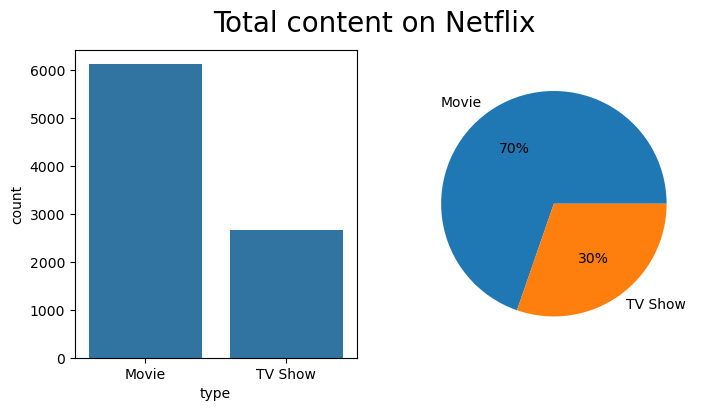

In [12]:
freq = data['type'].value_counts()
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.countplot(data, x=data['type'], ax = axes[0])
plt.pie(freq, labels=['Movie','TV Show'], autopct='%.0f%%')
plt.suptitle('Total content on Netflix', fontsize=20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Visual representation of rating frequency of movies and TV Shows on Netflix.

In [14]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

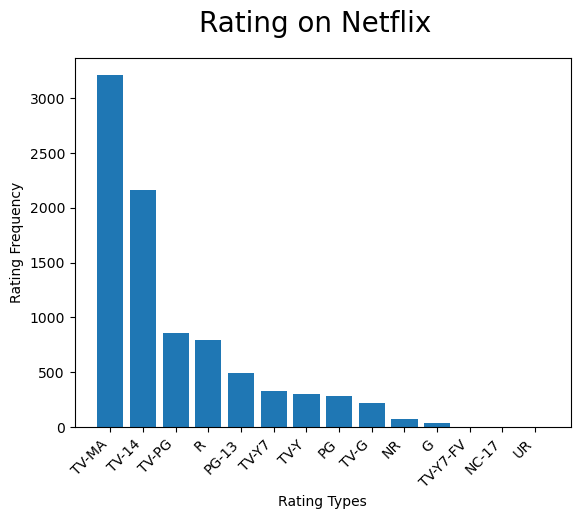

In [15]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count']) 
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Rating Types") 
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)


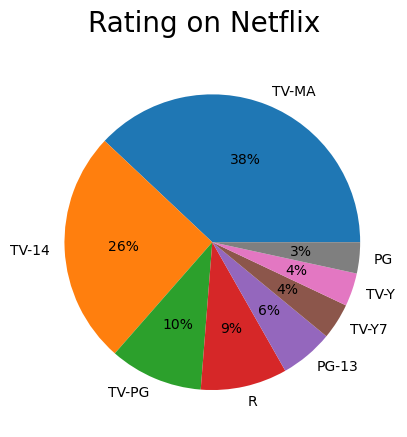

In [20]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

Converting date_added column to datetime.

In [29]:
#lets convert column date_added to datetime
data['date_added']=pd.to_datetime(data['date_added'], format="%d-%m-%Y")

In [27]:
print(data['date_added'])

0             NaT
1             NaT
2             NaT
3             NaT
4             NaT
          ...    
8785          NaT
8786          NaT
8787          NaT
8788          NaT
8789   2018-07-06
Name: date_added, Length: 8790, dtype: datetime64[ns]


In [28]:
print(data['date_added'].unique())

<DatetimeArray>
[                'NaT', '2021-01-05 00:00:00', '2021-12-06 00:00:00',
 '2021-07-05 00:00:00', '2021-10-09 00:00:00', '2021-09-09 00:00:00',
 '2021-07-09 00:00:00', '2021-02-09 00:00:00', '2021-01-09 00:00:00',
 '2021-07-04 00:00:00',
 ...
 '2019-08-07 00:00:00', '2016-07-07 00:00:00', '2017-04-05 00:00:00',
 '2015-02-12 00:00:00', '2017-04-03 00:00:00', '2016-08-02 00:00:00',
 '2015-01-02 00:00:00', '2017-05-10 00:00:00', '2019-11-09 00:00:00',
 '2014-01-04 00:00:00']
Length: 665, dtype: datetime64[ns]


In [22]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [30]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

Top 10 countries with most content on Netflix

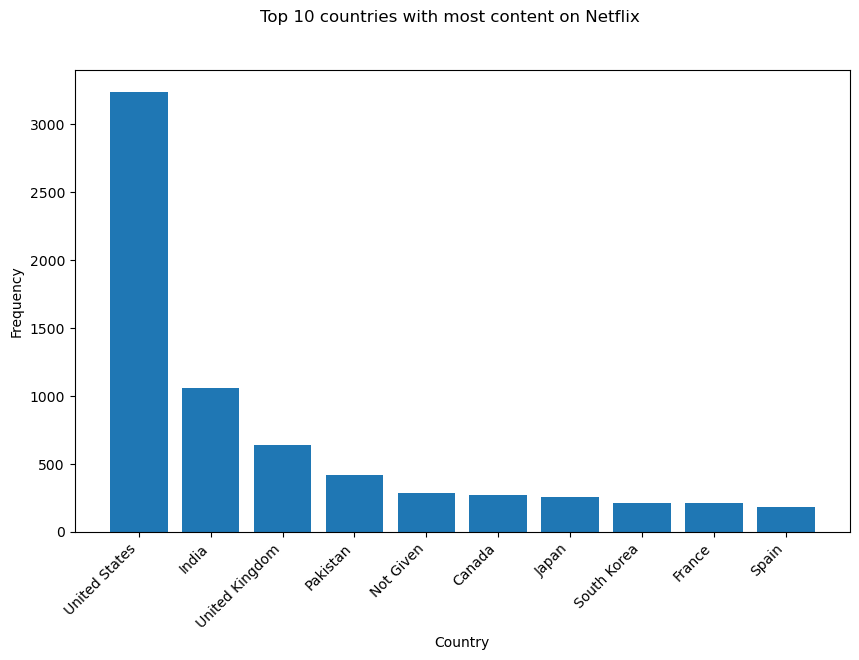

In [41]:
top_10_countries = data['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
top_10_countries
plt.figure(figsize=(10,6))
plt.bar(top_10_countries['country'], top_10_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [42]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day


Monthly releases of Movies and TV Shows on Netflix

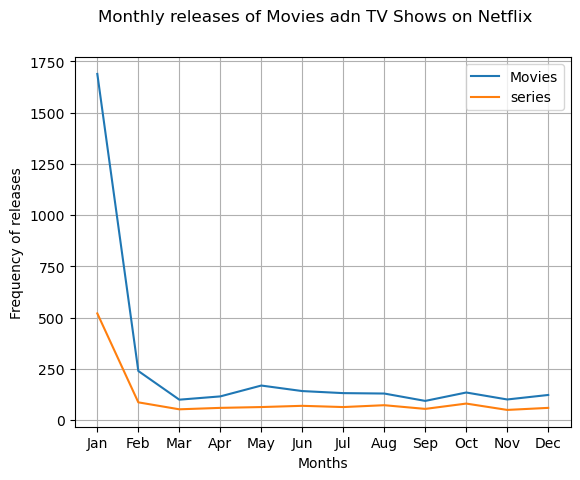

In [44]:
monthly_movie_releases=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_releases=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_releases.index, monthly_movie_releases.values, label='Movies')
plt.plot(monthly_series_releases.index, monthly_series_releases.values, label='series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13),['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies adn TV Shows on Netflix")
plt.show()

Yealry releases of Movies adn TV Shows on Netflix

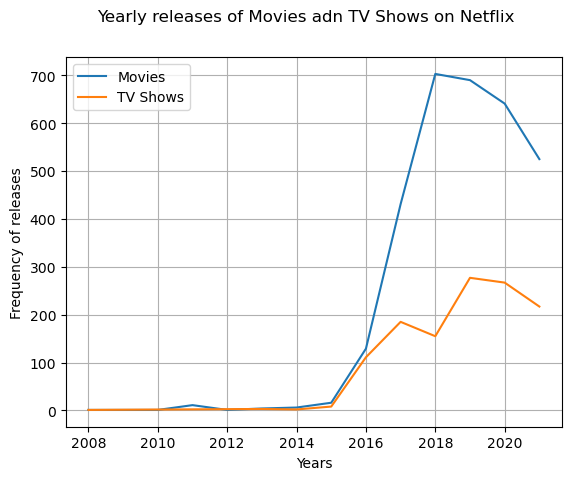

In [47]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.legend()
plt.grid(True)
plt.suptitle("Yearly releases of Movies adn TV Shows on Netflix")
plt.show()

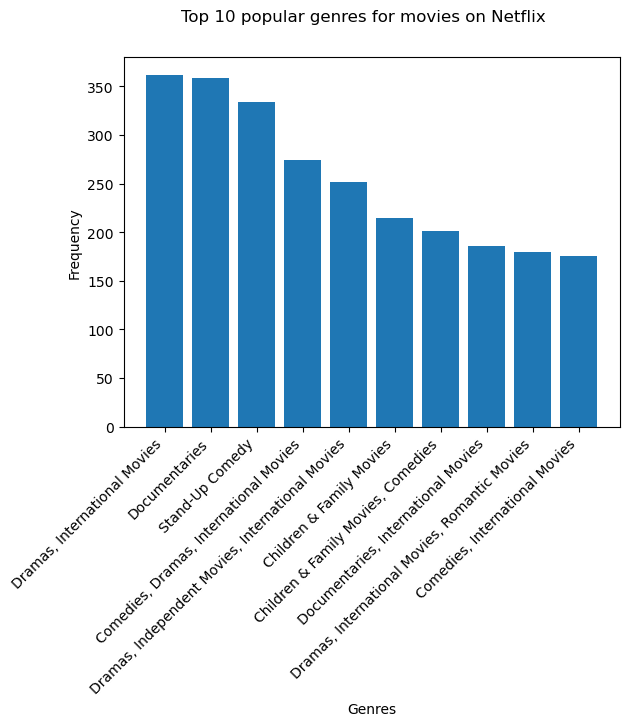

In [52]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index,popular_movie_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

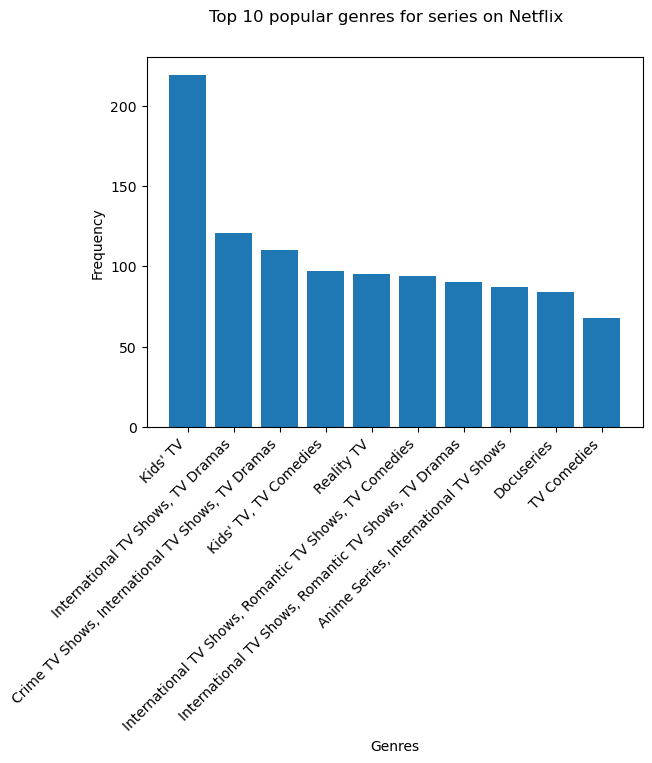

In [53]:
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.suptitle("Top 10 popular genres for series on Netflix")
plt.show()

Top 15 directors across Netflix with hoigh frequency of movies and shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

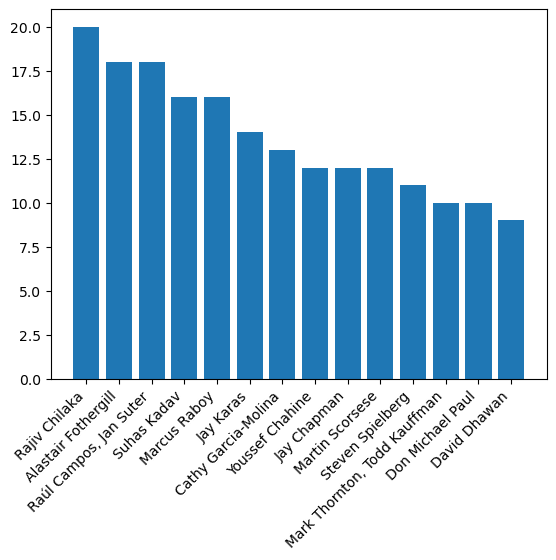

In [55]:
directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'],directors['count'])
plt.xticks(rotation=45,ha='right')


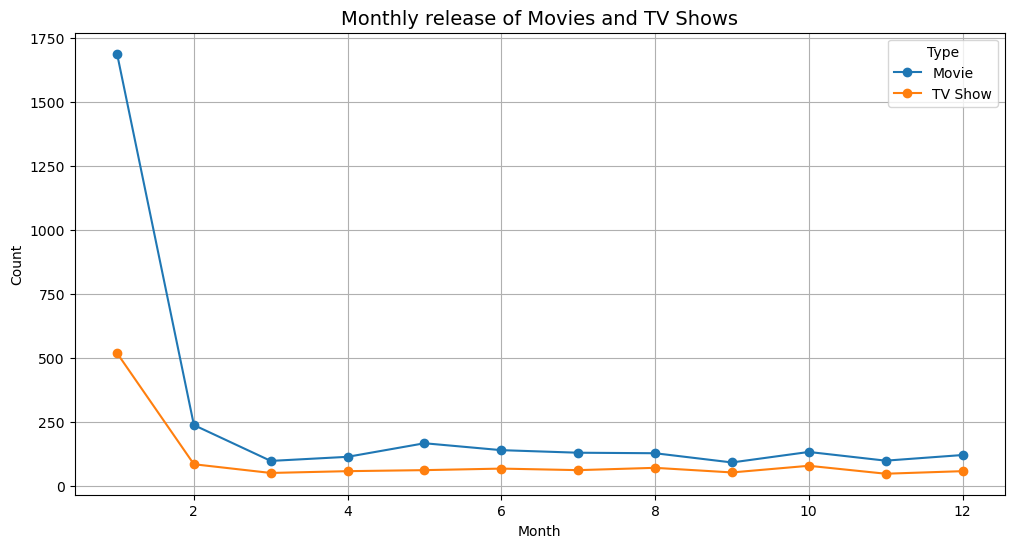

In [61]:
#distribution of monthly release

data['month_added'] = data['date_added'].dt.month

plt.figure(figsize=(12, 6))
data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='Type')
plt.grid(True)
plt.show()